<a href="https://colab.research.google.com/github/fabr0d/Topicos-de-IA/blob/master/regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# librerias y carga de archivos

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
from pylab import *


def leer_datos(text):
    file_1 = pd.read_csv(text, sep=',',header = 0)
    matrix = np.array(file_1)
    return matrix

def leer_datosC1(text):
    file_1 = pd.read_csv(text,sep=',',usecols=['MinTemp', 'MaxTemp', 'RainToday','RainTomorrow'],nrows=1000)
    file_1 = file_1.dropna()
    file_1['RainToday'] = (file_1['RainToday']=="Yes")*1
    file_1['RainTomorrow'] = (file_1['RainTomorrow']=="Yes")*1
    print(file_1)
    matrix = np.array(file_1)
    return matrix,file_1

def leer_datosC2(train,test,prueba):
  file_train = pd.read_csv(train,sep=',',usecols=['Sex', 'Age', 'Fare', 'Embarked','Survived'],header = 0)
  file_test = pd.read_csv(test,sep=',',usecols=['Sex', 'Age', 'Fare', 'Embarked'],header = 0)
  file_prueba = pd.read_csv(prueba,sep=',',usecols=['Survived'],header = 0)
  file_train = file_train[['Sex', 'Age', 'Fare', 'Embarked','Survived']]
  file_train = file_train.dropna()
  file_test['Survived'] = file_prueba #Agrego a Titanic_test la fila del atributo de clase
  file_test = file_test.dropna()
  file_train['Sex'] = file_train['Sex'].replace({'male':0,'female':1})
  file_train['Embarked'] = file_train['Embarked'].replace({'Q':0,'S':1,'C':2})
  file_test['Sex'] = file_test['Sex'].replace({'male':0,'female':1})
  file_test['Embarked'] = file_test['Embarked'].replace({'Q':0,'S':1,'C':2})
  #file_test = file_test.dropna()
  #file_prueba = file_prueba.dropna()
  matrix_train = np.array(file_train)
  matrix_test = np.array(file_test)
  print(matrix_train,matrix_test)
  return matrix_train,matrix_test

def leer_datosC3(text):
  file_1 = pd.read_csv(text,names=['buying','maint','doors','persons','lug_boot','safety','acceptability'])
  file_1['buying']=file_1['buying'].replace({'vhigh':5,'high':4,'med':3,'low':2})
  file_1['maint']=file_1['maint'].replace({'vhigh':5,'high':4,'med':3,'low':2})
  file_1['lug_boot']=file_1['lug_boot'].replace({'small':3,'med':4,'big':5})
  file_1['doors']=file_1['doors'].replace({'5more':5})
  file_1['persons']=file_1['persons'].replace({'more':5})
  file_1['safety']=file_1['safety'].replace({'low':3,'med':4,'high':5})
  file_1['acceptability']=file_1['acceptability'].replace({'unacc':1,'acc':2,'good':3,'vgood':4})
  file_1 = file_1.dropna()
  print(file_1)
  matrix = np.array(file_1)
  return matrix




# normalización

In [ ]:
def normalizar_datos(matrix):
    promedio = np.sum(matrix, axis = 0)/matrix.shape[0]
    minimos = matrix.min(axis = 0)
    maximos = matrix.max(axis = 0)
    matrix = (matrix - promedio)/(maximos - minimos)
    return matrix

def normalizar_datos1(matrix): 
    #promedio= np.mean(matrix,axis=0) 
    promedio = matrix.mean(axis=0)
    desviacion = matrix.std(axis=0)
    #for i in range(0,matrix.shape[0]): 
        #matrix[i] = np.true_divide(matrix[i] - promedio,desviacion) 
    matrix = (matrix - promedio)/desviacion
    return matrix

def normalizarNew(arr, columns):
    arr = arr[:,:].astype(float)

    for x in range(0, columns - 1):
        temp = arr[:, x]
        arr[:,x] = (temp - float(np.mean(temp))) / float(np.std(temp))
    temp = arr
    # Agregando columna de 1s
    #temp = np.zeros([arr.shape[0], arr.shape[1] + 1])
    #temp[:,0] = 1
    #temp[:,1:] = arr[:,:]

    return temp

def standardization(dataset):
  """ Standardization of numeric fields, where all values will have mean of zero 
  and standard deviation of one. (z-score)

  Args:
    dataset: A `Pandas.Dataframe` 
  """
  dtypes = list(zip(dataset.dtypes.index, map(str, dataset.dtypes)))
  # Normalize numeric columns.
  for column, dtype in dtypes:
      if dtype == 'float64':
          dataset[column] -= dataset[column].mean()
          dataset[column] /= dataset[column].std()
  return dataset

# conjuntos entrenamiento prueba

In [ ]:
def crear_entrenamiento_prueba(matrix,nombre):
  shuffled_indices = np.random.permutation(len(matrix))
  test_set_size = int(len(matrix) * 0.3)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  train_set = np.empty((0,matrix.shape[1]), float64)
  test_set = np.empty((0,matrix.shape[1]), float64)
  #print("indices",train_set)
  #print("row",np.array(matrix[0,:]))
  for indice in np.nditer(test_indices):
    test_set = np.append(test_set,np.array([matrix[indice,:]]),axis=0)
  for indice in np.nditer(train_indices):
    train_set = np.append(train_set,np.array([matrix[indice,:]]),axis=0)
# _entrenamiento = pd.DataFrame(data=entrenamiento.flatten())
# _prueba = pd.DataFrame(data=prueba.flatten())
# _entrenamiento.to_csv(nombre + '_entrenamiento.csv')
# _prueba.to_csv(nombre + '_prueba.csv')
  #return entrenamiento, prueba
  return train_set,test_set

# creacion de subconjuntos

In [ ]:
def crear_subconjuntos(entrenamiento):
    sep = entrenamiento.shape[1]-1
    x_array = entrenamiento[:, 0:sep]
    y_array = entrenamiento[:, sep:]
    x_array  = np.concatenate((np.ones((len(x_array), 1)), x_array), axis=1)
    return x_array, y_array


# Gradiente Descendente

In [ ]:

def sigmoidal(theta_array, x_array):
    return (1.0 / (1.0 + np.exp(-(np.dot(x_array, theta_array)))))

def calcular_funcion_costo(h_array, y_array):
    return (-1)*((1 / (h_array.shape[0])) * np.sum( (y_array * np.log(h_array)) + ((1-y_array) * np.log(1-h_array))))

def calcular_gradiente(h_array, y_array, x_array):
    return np.sum( ( h_array - y_array )* x_array)

def MSE(x_array, theta_array,y_array_real):
    y_array_prediccion = np.zeros((y_array_real.shape[1],1))
    y_array_prediccion = np.dot(x_array,theta_array)
    return ( 1 /  y_array_prediccion.shape[0] ) * np.sum( (y_array_prediccion - y_array_real) ** 2 )


def gradiente_descendiente(x_array, y_array, theta_array, num_iteracion, tasa_aprendizaje):   
  inicio_costos = np.zeros(num_iteracion)
  y_array = y_array > 0
  for j in range(num_iteracion):
    h_array = sigmoidal(theta_array, x_array)
    for i in range (theta_array.shape[0]):
      theta_array[i,0] = theta_array[i,0] - ( ( tasa_aprendizaje/ h_array.shape[0] ) * calcular_gradiente(h_array, y_array, x_array[:,i:i+1]))
    inicio_costos[j] = calcular_funcion_costo(h_array, y_array)
  return theta_array, inicio_costos
  
    
def calcular_accuracy(x_array, y_array, theta_array):
    y_array = y_array > 0
    sigmoidal_array = sigmoidal(theta_array, x_array) >= 0.5
    accuracy_array = (sigmoidal_array == y_array)    
    return ((np.sum(accuracy_array)*100) / accuracy_array.shape[0] )


def crear_k_folds(data_array, k):
    np.random.shuffle(data_array)
    temp_y = data_array[:, data_array.shape[1]-1:]
    temp_y = temp_y > 0
    tam_unos = np.sum(temp_y)
    tam_colums = data_array.shape[1]
    array_one = np.zeros((tam_unos, tam_colums))
    array_zero = np.zeros((data_array.shape[0] - tam_unos, tam_colums ))
    
    l = 0
    m = 0
    for i in range (data_array.shape[0]):
        if temp_y[i] == 1:
            array_one[l] = data_array[i]
            l = l + 1
        else:
            array_zero[m] = data_array[i]
            m = m + 1
            
#     print(array_one.shape)
#     print(array_zero.shape)
    
    num_one = int (array_one.shape[0] / k)
    num_zero = int (array_zero.shape[0] / k)
    data_k_folds = np.zeros((data_array.shape[0], tam_colums))
    l=0
    acc = 0
    for j in range (k):
        data_k_folds[acc:acc+num_one] = array_one[num_one*l:num_one*(l+1)]
        acc = acc + num_one
        data_k_folds[acc:acc+num_zero] = array_zero[num_zero*l:num_zero*(l+1)]
        acc = acc + num_zero
        l = l + 1       
    acc2 = array_one.shape[0] -(k*num_one)
    data_k_folds[acc: acc + acc2] = array_one[k*num_one:]
    acc = acc + acc2
    acc2 = array_zero.shape[0] -(k*num_zero)
    data_k_folds[acc: acc + acc2] = array_zero[k*num_zero:]
    acc = acc + array_zero.shape[0] -(k*num_one)
         
#     print(array_one) 
#     print(array_zero) 
#     print(data_array.shape)
#     print(data_k_folds)   
        
        
    num_partition = num_one + num_zero
    
    return data_k_folds, num_partition

def crear_k_folds_proportional(data_array,k,clase):
  rows_with_class = np.where(np_array[:,data_array.shape[1]]==clase)
  rows_without_class = np.where(np_array[:,data_array.shape[1]]!=clase)
  n_RwithC = len(rows_with_class)
  n_RwithoutC = len(rows_without_class)
  print("clase1",n_RwithC)
  print("clase1",n_RwithoutC)
  n_RwithC_for_fold = n_RwithC/k
  n_RwithoutC_for_fold = n_RwithoutC/k
  #######################################################################
  indice_for_RwithC = 0
  indice_for_RwithoutC = 0
  data_k_folds = np.empty((0,data_array.shape[1]), float64)
  for i in range(0,k):
    temp_fold = np.empty((0,data_array.shape[1]), float64)
    for rwic in range(0,n_RwithC):
      temp_fold.np.append(temp_fold,np.array([rows_with_class[indice_for_RwithC,:]]),axis=0)
      indice_for_RwithC+=1
    for rwoc in range(0,n_RwithoutC):
      pass
  return



#Main

In [ ]:
#lectura
matrix_clima,data_frame = leer_datosC1('weatherAUS.csv')
print(data_frame.info())
print("Datos cargados con éxito")
print(matrix_clima.dtype)

#normalizacion
normalizada_clima = normalizar_datos1(matrix_clima)
nNew = normalizarNew(matrix_clima,4)
standar = standardization(data_frame)
normalizada_clima = nNew
normalizada_clima.astype('float64')

#entrenamiento / prueba
clima_entrenamiento, clima_prueba = crear_entrenamiento_prueba(normalizada_clima,'RainTomorrow')
print("Datos de entrenamiento/prueba creados con éxito")
print(len(clima_entrenamiento),len(clima_prueba))

#creacion de x e y
x_array_clima, y_array_clima = crear_subconjuntos(clima_entrenamiento)
print("Tratando datos de entrenamiento")

x_array_clima_prueba, y_array_clima_prueba = crear_subconjuntos(clima_prueba)




     MinTemp  MaxTemp  RainToday  RainTomorrow
0       13.4     22.9          0             0
1        7.4     25.1          0             0
2       12.9     25.7          0             0
3        9.2     28.0          0             0
4       17.5     32.3          0             0
..       ...      ...        ...           ...
995      5.6     17.8          0             0
996     10.2     16.0          0             1
997     11.1     21.4          1             0
998      8.7     21.8          0             0
999     10.7     18.6          0             1

[988 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       988 non-null    float64
 1   MaxTemp       988 non-null    float64
 2   RainToday     988 non-null    int64  
 3   RainTomorrow  988 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 38.6 KB

In [ ]:
#lectura
titanic_train,titanic_test = leer_datosC2('titanic_train.csv','titanic_test.csv','gender_submission.csv')

#Nomalizar data
titanic_train = normalizarNew(titanic_train,5)
titanic_test = normalizarNew(titanic_test,5)

[[ 0.     22.      7.25    1.      0.    ]
 [ 1.     38.     71.2833  2.      1.    ]
 [ 1.     26.      7.925   1.      1.    ]
 ...
 [ 1.     19.     30.      1.      1.    ]
 [ 0.     26.     30.      2.      1.    ]
 [ 0.     32.      7.75    0.      0.    ]] [[  0.      34.5      7.8292   0.       0.    ]
 [  1.      47.       7.       1.       1.    ]
 [  0.      62.       9.6875   0.       0.    ]
 ...
 [  1.      28.       7.775    1.       1.    ]
 [  1.      39.     108.9      2.       1.    ]
 [  0.      38.5      7.25     1.       0.    ]]


test1_clima [[-0.63258567 -1.30850081  1.83096229  1.        ]
 [-0.96552718 -1.27031446 -0.54616089  1.        ]
 [ 1.00041319  0.16803797  1.83096229  1.        ]
 ...
 [-0.77527489 -0.91390855  1.83096229  0.        ]
 [-0.17280929 -0.30292699 -0.54616089  0.        ]
 [ 1.39677214  0.53717266  1.83096229  0.        ]]
tasa:  0.01  iteracion:  500
Tasa: 0.01  iteracion: 500  prome: 79.47026486756623
tasa:  0.01  iteracion:  1000
Tasa: 0.01  iteracion: 1000  prome: 80.33983008495753
tasa:  0.01  iteracion:  1500
Tasa: 0.01  iteracion: 1500  prome: 80.62843578210895
tasa:  0.01  iteracion:  2000
Tasa: 0.01  iteracion: 2000  prome: 80.48350824587706
tasa:  0.01  iteracion:  2500
Tasa: 0.01  iteracion: 2500  prome: 80.4822588705647
tasa:  0.01  iteracion:  3000
Tasa: 0.01  iteracion: 3000  prome: 80.62718640679661
tasa:  0.01  iteracion:  3500
Tasa: 0.01  iteracion: 3500  prome: 80.33733133433283
tasa:  0.05  iteracion:  500
Tasa: 0.05  iteracion: 500  prome: 80.4822588705647
tasa:  0.0

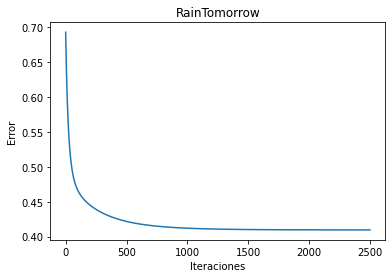

0.40965603874783135


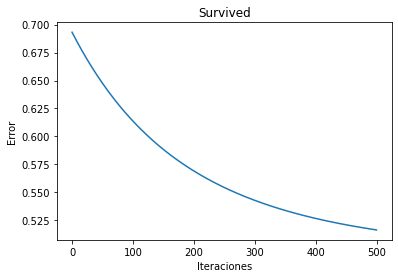

0.5164518853472498


In [ ]:
def ejercicio1(data_clima):
  data_k_clima, num_k_clima = crear_k_folds(data_clima,3)
  fold1_clima = data_k_clima[0: num_k_clima]
  fold2_clima = data_k_clima[num_k_clima : 2*num_k_clima]
  fold3_clima = data_k_clima[2*num_k_clima:]
    
  # entrenamietn fold1 y fold2  prueba fold3
  test1_clima = np.concatenate((fold1_clima,fold2_clima))
  x_test1_clima , y_test1_clima  = crear_subconjuntos(test1_clima)
  x_test1_p_clima , y_test1_p_clima  = crear_subconjuntos(fold3_clima)

  print("test1_clima",test1_clima)
    
  # entrenamietn fold1 y fold3  prueba fold2
  test2_clima = np.concatenate((fold1_clima,fold3_clima))
  x_test2_clima , y_test2_clima  = crear_subconjuntos(test2_clima)
  x_test2_p_clima , y_test2_p_clima  = crear_subconjuntos(fold2_clima)
    
  # entrenamietn fold2 y fold3  prueba fold1
  test3_clima = np.concatenate((fold2_clima,fold3_clima))
  x_test3_clima , y_test3_clima  = crear_subconjuntos(test3_clima)
  x_test3_p_clima , y_test3_p_clima  = crear_subconjuntos(fold1_clima)
    
  best_tasa = 0.01
  best_prom = 0
  best_iter = 0
  for tasa in [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]:
    for ite in range(500,4000,500):
      print("tasa: ", tasa, " iteracion: ", ite)
      #print(theta_clima_test1)
      theta_clima_test1 = np.zeros((data_clima.shape[1], 1))
      theta_clima_test2 = np.zeros((data_clima.shape[1], 1))
      theta_clima_test3 = np.zeros((data_clima.shape[1], 1))
      theta_clima_test1,cp1 = gradiente_descendiente(x_test1_clima, y_test1_clima, theta_clima_test1, ite, tasa) 
      theta_clima_test2,cp1 = gradiente_descendiente(x_test2_clima, y_test2_clima, theta_clima_test2, ite, tasa) 
      theta_clima_test3,cp1 = gradiente_descendiente(x_test3_clima, y_test3_clima, theta_clima_test3, ite, tasa) 
            
            
      num_accuracy_test1 = calcular_accuracy(x_test1_p_clima , y_test1_p_clima, theta_clima_test1)
      num_accuracy_test2 = calcular_accuracy(x_test2_p_clima , y_test2_p_clima, theta_clima_test2)
      num_accuracy_test3 = calcular_accuracy(x_test3_p_clima , y_test3_p_clima, theta_clima_test3)
            
      prom_general = (num_accuracy_test1 + num_accuracy_test2 + num_accuracy_test3)/3
      print("Tasa:",tasa," iteracion:",ite," prome:",prom_general)
      if(best_prom < prom_general):
        best_tasa = tasa
        best_prom = prom_general
        best_iter = ite
            
  return best_tasa,best_iter



def ejercicio2(data, text,TASA,ITER):
    
    x_array_ , y_array_  = crear_subconjuntos(data)
    theta_array_ = np.zeros((data.shape[1], 1))
    theta_array_,cp1 = gradiente_descendiente(x_array_, y_array_, theta_array_, ITER, TASA) 
    plt.xlabel("Iteraciones")  
    plt.ylabel("Error")
    plt.title(text)
    plot(cp1)
    show()   
    print(cp1[-1])
    return

tasaC1,iteC1 = ejercicio1(clima_entrenamiento)
print("La mejor tasa para C1:",tasaC1," Mejor número de iteraciones:",iteC1)

tasaC2,iteC2 = ejercicio1(titanic_train)
print("La mejor tasa para C2:",tasaC2," Mejor número de iteraciones:",iteC2)

ejercicio2(clima_entrenamiento, "RainTomorrow",tasaC1,iteC1)
ejercicio2(titanic_train, "Survived",tasaC2,iteC2)



#Experimento 3

In [ ]:
matrix_car = leer_datosC3('car_dataset.csv')
print("Datos cargados con éxito")

#normalizacion
normalizada_car = normalizarNew(matrix_car,7)
print("Datos normalizados con éxitos")
normalizada_car.astype('float64')
print(normalizada_car)

#entrenamiento / prueba
car_entrenamiento, car_prueba = crear_entrenamiento_prueba(normalizada_car,'acceptability')
#enfermedad_cardiaca_entrenamiento, enfermedad_cardiaca_prueba = crear_entrenamiento_prueba(normalizada_enfermedad_cardiaca,'consumo_petroleo') 
print("Datos de entrenamiento/prueba creados con éxito")
print(len(car_entrenamiento),len(car_prueba))
#print(car_entrenamiento)

#creacion de x e y
x_array_car, y_array_car = crear_subconjuntos(car_entrenamiento)
print("Tratando datos de entrenamiento")
#print(car_entrenamiento)

x_array_car_prueba, y_array_car_prueba = crear_subconjuntos(car_prueba)

      buying  maint doors persons  lug_boot  safety  acceptability
0          5      5     2       2         3       3              1
1          5      5     2       2         3       4              1
2          5      5     2       2         3       5              1
3          5      5     2       2         4       3              1
4          5      5     2       2         4       4              1
...      ...    ...   ...     ...       ...     ...            ...
1723       2      2     5       5         4       4              3
1724       2      2     5       5         4       5              4
1725       2      2     5       5         5       3              1
1726       2      2     5       5         5       4              3
1727       2      2     5       5         5       5              4

[1728 rows x 7 columns]
Datos cargados con éxito
Datos normalizados con éxitos
[[ 1.34164079  1.34164079 -1.34164079 ... -1.22474487 -1.22474487
   1.        ]
 [ 1.34164079  1.34164079 -1.341640

Tasa: 0.01  iteracion: 500  prome: 88.92546822920504
Tasa: 0.01  iteracion: 1000  prome: 89.00818121514385
Tasa: 0.01  iteracion: 1500  prome: 88.84295997837997
Tasa: 0.01  iteracion: 2000  prome: 89.17360718702143
Tasa: 0.01  iteracion: 2500  prome: 89.25632017296023
Tasa: 0.01  iteracion: 3000  prome: 89.25632017296023
Tasa: 0.01  iteracion: 3500  prome: 89.17381192213514
Tasa: 0.05  iteracion: 500  prome: 89.25632017296023
Tasa: 0.05  iteracion: 1000  prome: 89.17381192213514
Tasa: 0.05  iteracion: 1500  prome: 89.09130367131006
Tasa: 0.05  iteracion: 2000  prome: 89.09130367131006
Tasa: 0.05  iteracion: 2500  prome: 89.00879542048499
Tasa: 0.05  iteracion: 3000  prome: 89.09130367131006
Tasa: 0.05  iteracion: 3500  prome: 89.09130367131006
Tasa: 0.1  iteracion: 500  prome: 89.17381192213514
Tasa: 0.1  iteracion: 1000  prome: 89.09130367131006
Tasa: 0.1  iteracion: 1500  prome: 89.09130367131006
Tasa: 0.1  iteracion: 2000  prome: 89.09130367131006
Tasa: 0.1  iteracion: 2500  prome: 

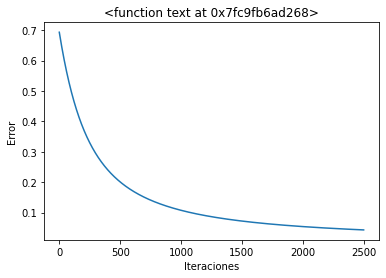

0.0427919858358974


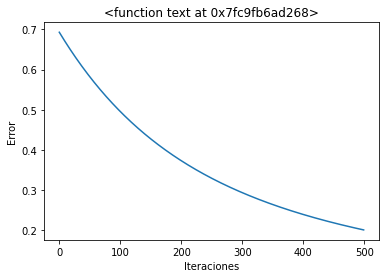

0.20091465257734345


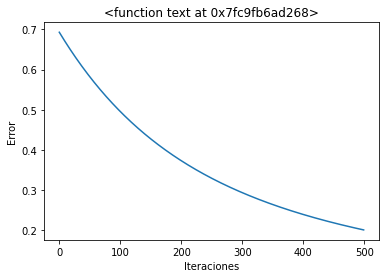

0.20091465257734345


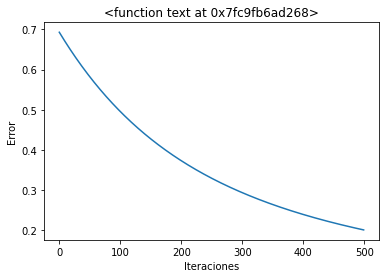

0.20091465257734345


In [ ]:
def treat_y_array(y_array,clase):
  y_array[y_array != clase] = 0
  y_array[y_array == clase] = 1
  return y_array

def k_folds_for_class(data_clima,clase):
  data_clima[:,-1] = treat_y_array(data_clima[:,-1],clase)
  data_k_clima, num_k_clima = crear_k_folds(data_clima,3)
  fold1_clima = data_k_clima[0: num_k_clima]
  fold2_clima = data_k_clima[num_k_clima : 2*num_k_clima]
  fold3_clima = data_k_clima[2*num_k_clima:]
    
  # entrenamietn fold1 y fold 2  prueba fold3
  test1_clima = np.concatenate((fold1_clima,fold2_clima))
  x_test1_clima , y_test1_clima  = crear_subconjuntos(test1_clima)
  #y_test1_clima = treat_y_array(y_test1_clima,clase)
  x_test1_p_clima , y_test1_p_clima  = crear_subconjuntos(fold3_clima)
  #y_test1_p_clima = treat_y_array(y_test1_p_clima,clase)

  #print("treat result con clase",clase,y_test1_p_clima)
    
  # entrenamietn fold1 y fold 3  prueba fold2
  test2_clima = np.concatenate((fold1_clima,fold3_clima))
  x_test2_clima , y_test2_clima  = crear_subconjuntos(test2_clima)
  #y_test2_clima = treat_y_array(y_test2_clima,clase)
  x_test2_p_clima , y_test2_p_clima  = crear_subconjuntos(fold2_clima)
  #y_test2_p_clima = treat_y_array(y_test2_p_clima,clase)
    
  # entrenamietn fold2 y fold3  prueba fold1
  test3_clima = np.concatenate((fold2_clima,fold3_clima))
  x_test3_clima , y_test3_clima  = crear_subconjuntos(test3_clima)
  #y_test3_clima = treat_y_array(y_test3_clima,clase)
  x_test3_p_clima , y_test3_p_clima  = crear_subconjuntos(fold1_clima)
  #y_test3_p_clima = treat_y_array(y_test3_p_clima,clase)
  
  best_tasa = 0.01
  best_prom = 0
  for tasa in [0.01, 0.05, 0.1, 0.2, 0.3, 0.4]:
    for ite in range(500,4000,500):
      #print("tasa: ", tasa, " iteracion: ", ite)
      #print(theta_clima_test1)
      theta_clima_test1 = np.zeros((data_clima.shape[1], 1))
      theta_clima_test2 = np.zeros((data_clima.shape[1], 1))
      theta_clima_test3 = np.zeros((data_clima.shape[1], 1))
      theta_clima_test1,cp1 = gradiente_descendiente(x_test1_clima, y_test1_clima, theta_clima_test1, ite, tasa) 
      theta_clima_test2,cp1 = gradiente_descendiente(x_test2_clima, y_test2_clima, theta_clima_test2, ite, tasa) 
      theta_clima_test3,cp1 = gradiente_descendiente(x_test3_clima, y_test3_clima, theta_clima_test3, ite, tasa) 
            
            
      num_accuracy_test1 = calcular_accuracy(x_test1_p_clima , y_test1_p_clima, theta_clima_test1)
      num_accuracy_test2 = calcular_accuracy(x_test2_p_clima , y_test2_p_clima, theta_clima_test2)
      num_accuracy_test3 = calcular_accuracy(x_test3_p_clima , y_test3_p_clima, theta_clima_test3)
            
      prom_general = (num_accuracy_test1 + num_accuracy_test2 + num_accuracy_test3)/3
      print("Tasa:",tasa," iteracion:",ite," prome:",prom_general)
      if(best_prom < prom_general):
        best_tasa = tasa
        best_prom = prom_general
        best_iter = ite
            
  return best_tasa,best_iter

def entrenar(data,clase,tasa,iter):
  x_array_ , y_array_  = crear_subconjuntos(data)
  y_array_ = treat_y_array(y_array_,clase) #Vuelve a la clase 1 y a las demás clases 0
  theta_array_ = np.zeros((data.shape[1], 1))
  theta_array_,cp1 = gradiente_descendiente(x_array_, y_array_, theta_array_, iter, tasa) 
  plt.xlabel("Iteraciones")  
  plt.ylabel("Error")
  plt.title(text)
  plot(cp1)
  show()   
  print(cp1[-1])
  return  theta_array_

def ejercicio3(car_data):
  #Tenemos 4 clases unacc acc good vgood
  tasa_class1,ite_class1 = k_folds_for_class(car_data,1)
  tasa_class2,ite_class2 = k_folds_for_class(car_data,2)
  tasa_class3,ite_class3 = k_folds_for_class(car_data,3)
  tasa_class4,ite_class4 = k_folds_for_class(car_data,4)
  theta_class1 = entrenar(car_data,1,tasa_class1,ite_class1)
  theta_class2 = entrenar(car_data,1,tasa_class2,ite_class2)
  theta_class3 = entrenar(car_data,1,tasa_class3,ite_class3)
  theta_class4 = entrenar(car_data,1,tasa_class4,ite_class4)
# x max(thetas)
ejercicio3(car_entrenamiento)

